# Import Libraries

In [55]:
from urllib.request import urlretrieve
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load dataset

In [56]:
# URL for hypothermia dataset: 
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
#Download file

raw_data = urlopen(url)

In [57]:
#Read the csv into a dataframe
dataset = np.genfromtxt(raw_data, dtype=None, delimiter=",", encoding=None)
df = pd.DataFrame(dataset)
df.columns = ['L-CORE','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','ADM-DECS']
#headers = ['L-CORE','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','ADM-DECS']
#df = pd.read_csv(raw_data,names = headers, comment = '#')
#df.head()

# Preprocessing

## Convert missing '?' values to NaN

In [58]:
df.COMFORT = df.COMFORT.apply(pd.to_numeric, errors = 'coerce')

In [59]:
#Check to see if the ? values in Comfort were converted to NaN. Null count for comfort should equal 3.
df.isnull().sum()

L-CORE       0
L-SURF       0
L-02         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64

## Impute missing 'NaN' data by mean

Need to import IMPUTER from sklearn.preprocessing. Will use an imputing kernel looking for 'NaN' along axis=0 and replace these values with the mean using imp.fit_transform.

In [60]:
#Import imputer
from sklearn.preprocessing import Imputer

#Set up imp 'kernel' and use it to replace 'NaN' values 
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#Use .fit_transform to replace 'NaN' values with mean comfort level.
df["COMFORT"] = imp.fit_transform(df[["COMFORT"]])


Check df to see if NaN values are replaced (one of them at patient 70)

In [61]:
#Check comfort at index 70, which was one spot that had been 'NaN'
df["COMFORT"][70]

10.942528735632184

# Plot Each Feature Against Comfort

A boxplot and swarmplot are included for each categorical feature plotted against comfort. The boxplots illustrate the distribution of comfort level scores across each level of the categorical feature on the x-axis, while the swarmplots show the relative number of data points per categorical feature level that make up these distributions. 

In [62]:
import seaborn as sns
%matplotlib inline
#to plot the graphs inline on jupyter notebook

## Comfort vs. L-CORE

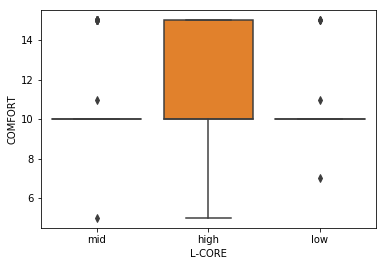

In [63]:
sns.boxplot(x=df['L-CORE'],y=df['COMFORT'])

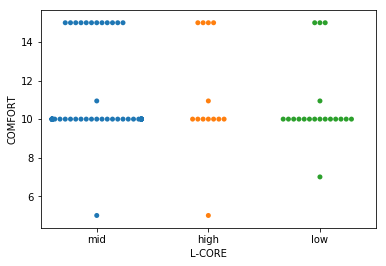

In [64]:
sns.swarmplot(x=df['L-CORE'],y=df['COMFORT'])

The boxplot of Comfort vs. L-CORE shows that patients with high internal temperatures had an IQR of comfort responses that stretched above 10, with a lower whisker response of 5. In contrast to high L-CORE, the boxplot shows both the mid- and low-L-CORE groups have similar IQRs that both lie on a comfort level of 10 with outliers above and below the IQR. 

## COMFORT vs. L-SURF

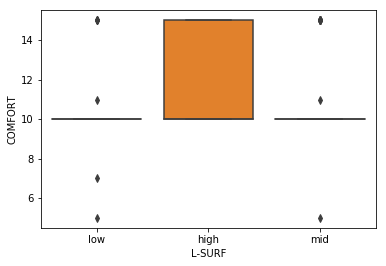

In [65]:
sns.boxplot(x=df['L-SURF'],y=df['COMFORT'])

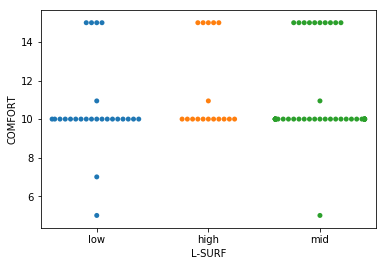

In [66]:
sns.swarmplot(x=df['L-SURF'],y=df['COMFORT'])

The Comfort vs. L-SURF boxplot shows that patients with high (>36.5) surface temperatures have an IQR that stretches above comfort level 10. From the boxplot, patients with mid (>= 36.5 and <= 35) and low (< 35) surface temperatures  show similar distributions of comfort level scores, with the low L-SURF group being skewed slightly more left by outliers than the mid L-SURF group. The range of comfort values for both the mid- and low-L-SURF groups are larger than the range for the high L-SURF group.


## COMFORT vs. L-02

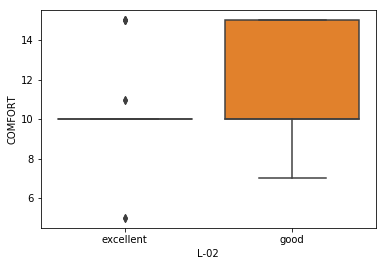

In [67]:
sns.boxplot(x=df['L-02'],y=df['COMFORT'])

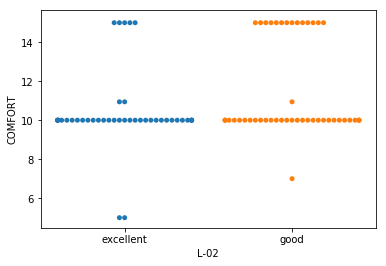

In [68]:
sns.swarmplot(x=df['L-02'],y=df['COMFORT'])

The boxplot of L-O2 vs. Comfort shows a negative correlation in the reported comfort score when moving from good O2 saturation to excellent O2 saturation (excellent (>= 98), good (>= 90 and < 98)). That is, patients with good O2 saturation have a distribution of comfort level scores that was skewed more rightward than those with excellent O2 saturation. Note that there were no patients who fell into the 'mid' L-O2 group.

## COMFORT vs. L-BP

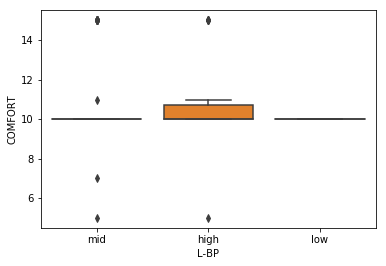

In [69]:
sns.boxplot(x=df['L-BP'],y=df['COMFORT'])

Boxplot shows that comfort level for low-L-BP has mean of 10, with all points lying on the mean. This plot does not give much information in regards to the number of points per comfort level, so add a swarm plot for better visualization

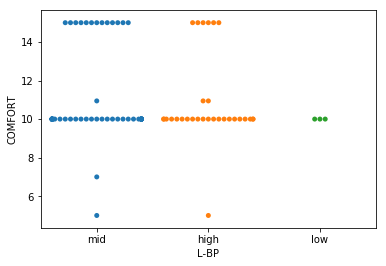

In [70]:
sns.swarmplot(x=df['L-BP'],y=df['COMFORT'])

Swarm plot able to show that there were only 3 patients under the "low" subcategory of the L-BP feature. If one were to only look at a boxplot of this data, this information would not be represented. 

Both plots show that patients under the mid- and high- L-BP subcategories have similar distributions of reported comfort levels.

## COMFORT vs. SURF-STBL

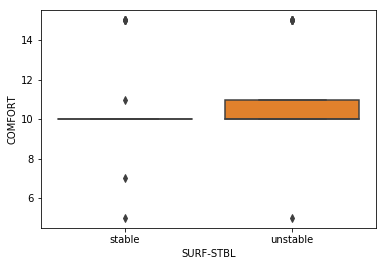

In [71]:
sns.boxplot(x=df['SURF-STBL'],y=df['COMFORT'])

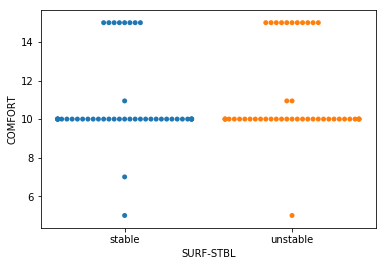

In [72]:
sns.swarmplot(x=df['SURF-STBL'],y=df['COMFORT'])

The boxplots of surface temperature stability vs. comfort level show 1) there were no patients with moderate stability, and 2) the distribution of comfort scores for both the stable and unstable SURF-STBL groups were similar, with the unstable group having an IQR slightly larger (and extending towards higher comfort levels) than the stable group. The swarmplot shows that the number of data points for both 'stable' and 'unstable' SURF-STBL groups is similar.

## COMFORT vs. CORE-STBL

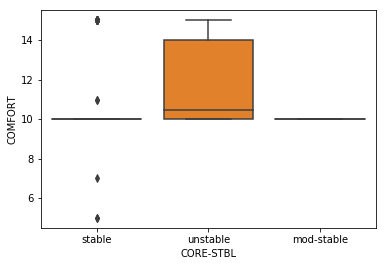

In [73]:
sns.boxplot(x=df['CORE-STBL'],y=df['COMFORT'])

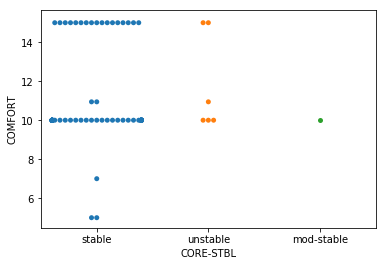

In [74]:
sns.swarmplot(x=df['CORE-STBL'],y=df['COMFORT'])

The swarmplot shows only one patient was classified under the mod-stable category of CORE-STBL. Most patients in this feature lie in the 'stable' subcategory and their comfort levels were skewed right, with an IQR on 10. The 'stable' subcategory has few datapoints, but the boxplot of this subcategory showed a comfort level distribution skewed right (above 10).

## COMFORT vs. BP-STBL

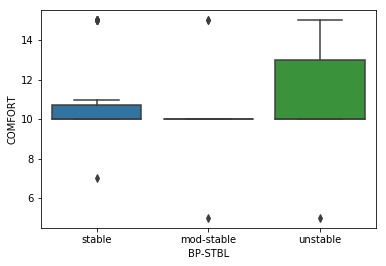

In [75]:
sns.boxplot(x=df['BP-STBL'],y=df['COMFORT'])

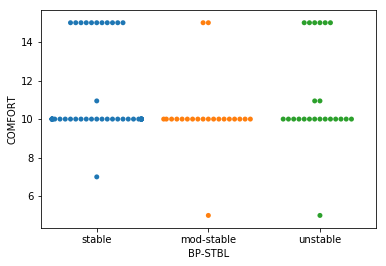

In [76]:
sns.swarmplot(x=df['BP-STBL'],y=df['COMFORT'])

The swarmplot shows that there are a similar number of datapoints in each subcategory of BP-STBL. The boxplot shows that patients in the unstable BP-STBL sub-group had a distribution in reported comfort levels with a larger IQR than the 'stable' and 'mod-stable' groups. Additionally, the reported comfort level distribution of the'unstable' BP-STBL population is skewed right. 

This means that many patients with unstable blood pressure had a perceived comfort level of 10 or higher at discharge, which is comparatively larger than 'stable' and 'mod-stable' patients (although not necessarily statistically significant). Although the trends appear this way, it's difficult to draw accurate inference on the statistical significance due to small sample size in each sub-group (i.e. stable, mod-stable, stable).

## Comfort vs. ADM-DECS

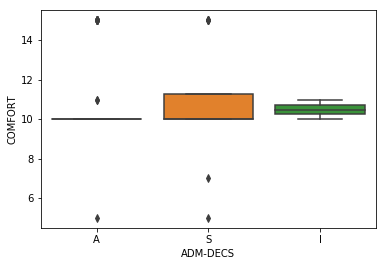

In [77]:
sns.boxplot(x=df['ADM-DECS'],y=df['COMFORT'])

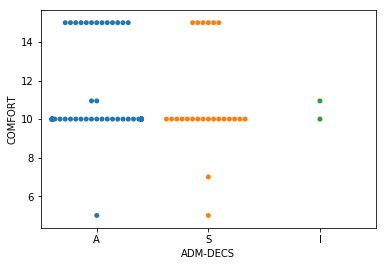

In [79]:
sns.swarmplot(x=df['ADM-DECS'],y=df['COMFORT'])

Boxplot shows a deciving IQR for the patients reported levels of comfort in the 'I' subcategory of ADM-DECS; the swarmplot shows that there are too few datapoints in number of patients sent to the ICU 'I' to infer on the relationship of comfort to ICU admission. Patients prepared to go home ('S') and patients sent to the general hospital floor ('A') had similar distributions of perceived comfort levels upon discharge, with 'A' patients having a distribution of comfort values slightly more skewed right than 'S' patients.

## Summary

The three missing comfort values out of the dataset of 90 patients were imputed using the mean comfort value. These missing values were not removed because the dataset sample size is arguably too small to completely remove 3 patients from consideration, especially considering the fact that each categorical feature has multiple levels. Many of the comfort values were reported as either 5, 10, or 15 (mode = 10). Because of this, the outlier data points are arguably an important part of the distribution of comfort values with respect to each categorical feature, and thus mean imputation is desirable because of its sensitivity to outliers. 


Many of the conclusions regarding the relationship of Comfort to each categorical variable are limited due to the small sample size in each level of the categorical features. However, Comfort vs. BP-STBL had the most even number of data points in each categorical feature level, so the implications of this relationship are mentioned in more detail than the other feature relationships. 